# XYZ's Cab Company Investment Case Study

## What’s the Overall Project About?
A company named **XYZ** is thinking about investing in the cab industry. Now as a **Data Analyst** I have to help them analyse company data from two cab companies named **Pink Cab** and **Yellow Cab** respectively, to figure out which one is a better investment.
 

(I have tried to explain every step in detail so that even a beginner should be able to follow up with all the steps. I have tried to explain code lines with comments so that it will be easier for even me when I come back to this notebook.)

## Table of Contents
1. Data Loading
2. Data Understanding, Cleaning & Preparation
3. Making a Master File Dataset
4. Final Data Health Check (Pre-Analysis Audit)
5. Exploratory Data Analysis (EDA)
6. Hypothesis Testing and Insights
7. Final Business Recommendations

### 1. Data Loading

This is the first step in analyzing cab company data for XYZ's investment decision.
We'll load all CSV files and explore the structure of each dataset.

In [3]:
import pandas as pd

#Loading datasets

cab_data = pd.read_csv(r"C:\After Backup\Virtual Internship\Week 2\Cab_Data.csv")
city_data = pd.read_csv(r"C:\After Backup\Virtual Internship\Week 2\City.csv")
customer_data = pd.read_csv(r"C:\After Backup\Virtual Internship\Week 2\Customer_ID.csv")
transaction_data = pd.read_csv(r"C:\After Backup\Virtual Internship\Week 2\Transaction_ID.csv")

#first look at the datsets - first 5 rows

print("Cab Data:")
display(cab_data.head())

print("\nCity Data:")
display(city_data.head())

print("\nCustomer Data:")
display(customer_data.head())

print("\nTransaction Data:")
display(transaction_data.head())

Cab Data:


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776



City Data:


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"



Customer Data:


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536



Transaction Data:


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


### 2. Data Understanding, Cleaning & Preparation

In this step, we will understand the datasets carefully.

1. Cab Data Exploration

In [7]:
# Basic Info about Cab Data

print("Cab Data Shape:", cab_data.shape)
print("\nCab Data Columns:\n", cab_data.columns)

# Data types of each column
print("\nData Types:")
print(cab_data.dtypes)

# Check for missing/null values
print("\nMissing Values:")
print(cab_data.isnull().sum())

# Basic stats summary (only for numeric columns)
print("\nSummary Statistics:")
print(cab_data.describe())

Cab Data Shape: (359392, 7)

Cab Data Columns:
 Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

Data Types:
Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

Missing Values:
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

Summary Statistics:
       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000    

In [21]:
# Cleaning - Changing format of 'Date of Travel' to date from large numbers
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], origin='1899-12-30', unit='D')

In [22]:
cab_data.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

2. City Data Exploration

In [11]:
# Basic Info about City Data

print("City Data Shape:", city_data.shape)
print("\nCity Data Columns:\n", city_data.columns)

# Data types of each column
print("\nData Types:")
print(city_data.dtypes)

# Check for missing/null values
print("\nMissing Values:")
print(city_data.isnull().sum())

# Basic stats summary (only for numeric columns)
print("\nSummary Statistics:")
print(city_data.describe())

City Data Shape: (20, 3)

City Data Columns:
 Index(['City', 'Population', 'Users'], dtype='object')

Data Types:
City          object
Population    object
Users         object
dtype: object

Missing Values:
City          0
Population    0
Users         0
dtype: int64

Summary Statistics:
               City   Population      Users
count            20           20         20
unique           20           20         20
top     NEW YORK NY   8,405,837    302,149 
freq              1            1          1


In [18]:
# Cleaning - Changing format of 'Population' and 'Users' to integers from string by removing the commas and spaces

city_data['Population'] = city_data['Population'].str.replace(',', '').str.strip().astype(int)
city_data['Users'] = city_data['Users'].str.replace(',', '').str.strip().astype(int)

In [23]:
city_data.dtypes


City          object
Population     int64
Users          int64
dtype: object

3. Customer Data Exploration

In [12]:
# Basic Info about Customer Data

print("Customer Data Shape:", customer_data.shape)
print("\nCustomer Data Columns:\n", customer_data.columns)

# Data types of each column
print("\nData Types:")
print(customer_data.dtypes)

# Check for missing/null values
print("\nMissing Values:")
print(customer_data.isnull().sum())

# Basic stats summary (only for numeric columns)
print("\nSummary Statistics:")
print(customer_data.describe())

Customer Data Shape: (49171, 4)

Customer Data Columns:
 Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

Data Types:
Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

Missing Values:
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

Summary Statistics:
        Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000     42.000000        21035.000000
max    60000.000000     65.000000        35000.000000


4. Transaction Data Exploration

In [13]:
# Basic Info about Transaction Data

print("Transaction Data Shape:", transaction_data.shape)
print("\nTransaction Data Columns:\n", transaction_data.columns)

# Data types of each column
print("\nData Types:")
print(transaction_data.dtypes)

# Check for missing/null values
print("\nMissing Values:")
print(transaction_data.isnull().sum())

# Basic stats summary (only for numeric columns)
print("\nSummary Statistics:")
print(transaction_data.describe())

Transaction Data Shape: (440098, 3)

Transaction Data Columns:
 Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

Data Types:
Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

Missing Values:
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

Summary Statistics:
       Transaction ID    Customer ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   21195.549816
min      1.000001e+07       1.000000
25%      1.011004e+07    3530.000000
50%      1.022006e+07   15168.000000
75%      1.033008e+07   43884.000000
max      1.044011e+07   60000.000000


### 3. Making a Master File Dataset

1. We will first merge 'cab_data' and 'transaction_data' using 'Transaction ID' as the key

In [27]:
cab_merged = pd.merge(cab_data, transaction_data, on='Transaction ID', how='inner')

In [28]:
display(cab_merged.head())

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


2. Now we will merge this file with 'customer_data' using 'Customer ID' as the key

In [29]:
cab_merged = pd.merge(cab_merged, customer_data, on='Customer ID', how='inner')

In [30]:
display(cab_merged.head())

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


3. Now we will finally make a master file by merging above with 'city_data' using 'City' as the key

In [31]:
cab_merged = pd.merge(cab_merged, city_data, on='City', how='left')

In [34]:
print("Shape of final merged data:", cab_merged.shape)
print("\nColumns in merged dataset:\n", cab_merged.columns)
display(cab_merged.head())

Shape of final merged data: (359392, 14)

Columns in merged dataset:
 Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users'],
      dtype='object')


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701


### 4. Final Data Health Check (Pre-Analysis Audit)

1. We'll check for duplicate values

In [36]:
# Check for fully duplicate rows
duplicates = cab_merged.duplicated().sum()
print("Total Duplicate Rows:", duplicates)

# Check if Transaction ID appears more than once as it should be unique
transaction_duplicates = cab_merged['Transaction ID'].duplicated().sum()
print("Duplicate Transaction IDs:", transaction_duplicates)


Total Duplicate Rows: 0
Duplicate Transaction IDs: 0


2. We'll check for missing values

In [37]:
print("Missing values in each column:")
print(cab_merged.isnull().sum())


Missing values in each column:
Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64


3. We'll check for invalid or abnormal values

In [38]:
# Negative or zero distances
print("Trips with KM <= 0:", cab_merged[cab_merged['KM Travelled'] <= 0].shape[0])

# Negative or zero prices
print("Trips with Price Charged <= 0:", cab_merged[cab_merged['Price Charged'] <= 0].shape[0])

# Check for negative cost
print("Trips with Cost of Trip <= 0:", cab_merged[cab_merged['Cost of Trip'] <= 0].shape[0])

# Check for customers with Age < 18 or > 100
print("Unusual customer ages:", cab_merged[(cab_merged['Age'] < 18) | (cab_merged['Age'] > 100)].shape[0])

# Check for unrealistic income
print("Customers with income > 50,000:", cab_merged[cab_merged['Income (USD/Month)'] > 50000].shape[0])


Trips with KM <= 0: 0
Trips with Price Charged <= 0: 0
Trips with Cost of Trip <= 0: 0
Unusual customer ages: 0
Customers with income > 50,000: 0


4. Outliers

In [40]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/8.1 MB 11.8 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/8.1 MB 11.2 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------------- - 2.1/2.2 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 11.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------------------------- -------- 2.1/2.6 MB 13.1 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 11.6 MB/s eta 0:00:00


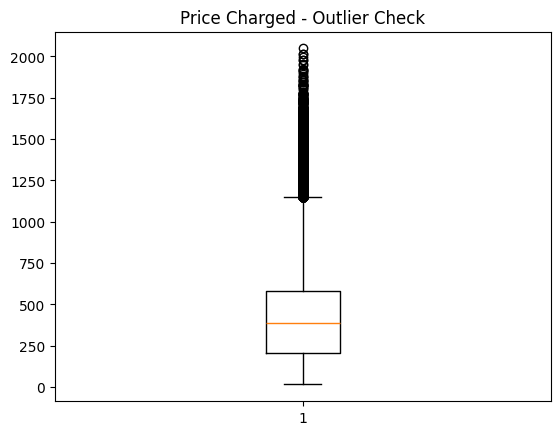

In [41]:
import matplotlib.pyplot as plt

# Boxplot to visualize outliers in Price Charged
plt.boxplot(cab_merged['Price Charged'])
plt.title("Price Charged - Outlier Check")
plt.show()


### 5. Exploratory Data Analysis (EDA)

1. How many rides each company got (overall & monthly)?

In [42]:
# Total rides by company
cab_merged['Company'].value_counts()

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64

<Axes: title={'center': 'Monthly Rides by Company'}, xlabel='Month'>

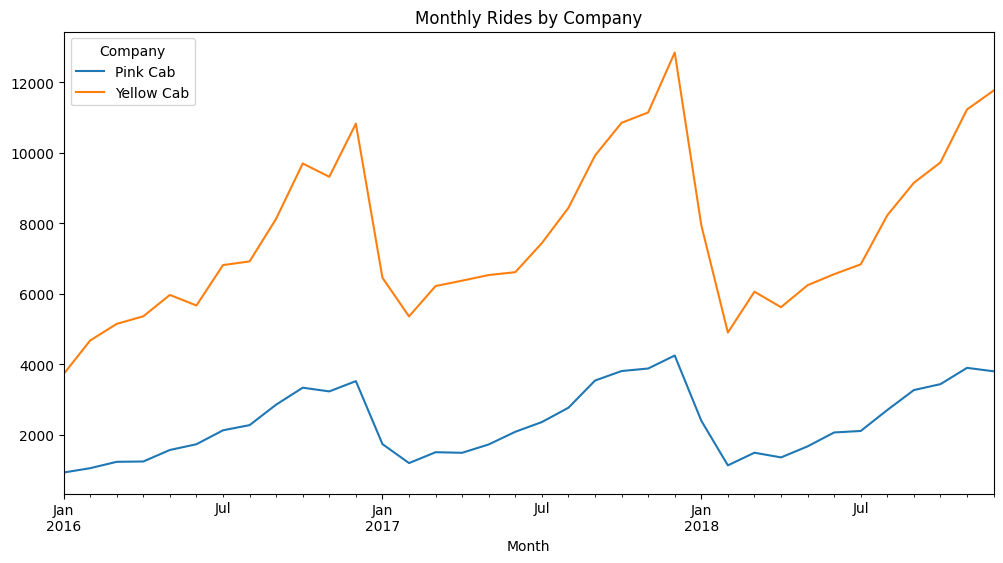

In [43]:
# Create a new column for month and year
cab_merged['Month'] = cab_merged['Date of Travel'].dt.to_period('M')

# Group by month and company
monthly_rides = cab_merged.groupby(['Month', 'Company']).size().unstack()

# Plot it
monthly_rides.plot(kind='line', figsize=(12,6), title="Monthly Rides by Company")


2. Revenue comparison

In [44]:
revenue_by_company = cab_merged.groupby('Company')['Price Charged'].sum()
print(revenue_by_company)

Company
Pink Cab      2.632825e+07
Yellow Cab    1.258539e+08
Name: Price Charged, dtype: float64


In [45]:
# Add profit column
cab_merged['Profit'] = cab_merged['Price Charged'] - cab_merged['Cost of Trip']

# Compare total profit per company
profit_by_company = cab_merged.groupby('Company')['Profit'].sum()
print(profit_by_company)


Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Profit, dtype: float64


 3. Customer Segmentation

<Axes: title={'center': 'Customer Gender Distribution'}, xlabel='Gender'>

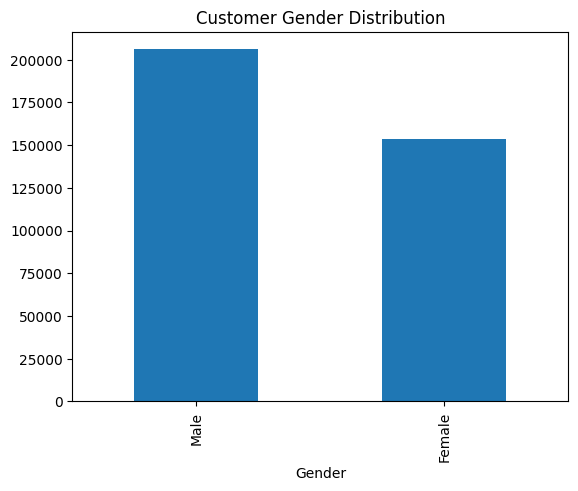

In [47]:
# 1. Gender distribution
cab_merged['Gender'].value_counts().plot(kind='bar', title="Customer Gender Distribution")

<Axes: title={'center': 'Customer Age Groups'}, xlabel='Age_Group'>

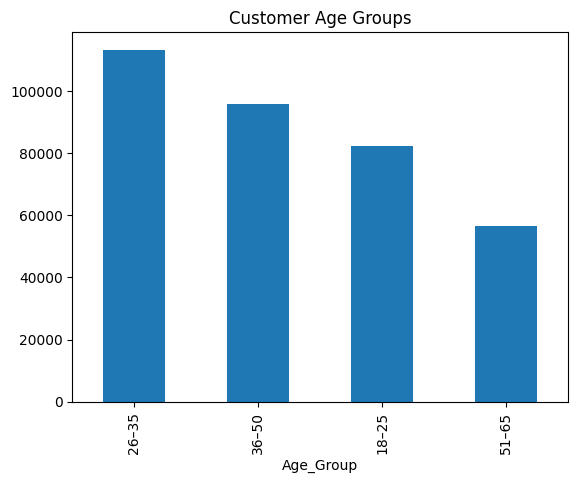

In [48]:
# 2. Age group distribution
cab_merged['Age_Group'] = pd.cut(cab_merged['Age'], bins=[18, 25, 35, 50, 65], labels=['18–25', '26–35', '36–50', '51–65'])
cab_merged['Age_Group'].value_counts().plot(kind='bar', title="Customer Age Groups")

4. Payment mode trends

<Axes: title={'center': 'Payment Mode by Company'}, xlabel='Company'>

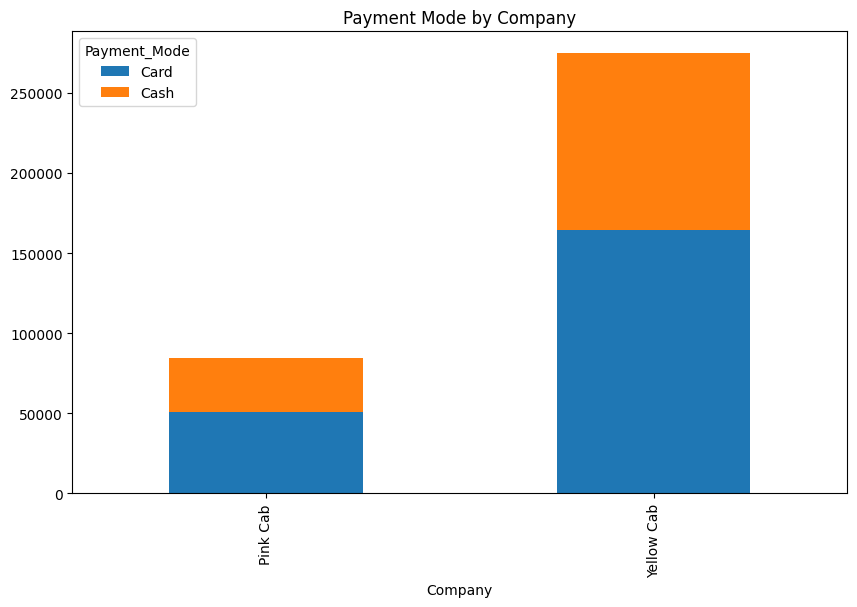

In [49]:
payment_trend = cab_merged.groupby(['Company', 'Payment_Mode']).size().unstack()
payment_trend.plot(kind='bar', stacked=True, title="Payment Mode by Company", figsize=(10,6))

5. City-level usage and user penetration

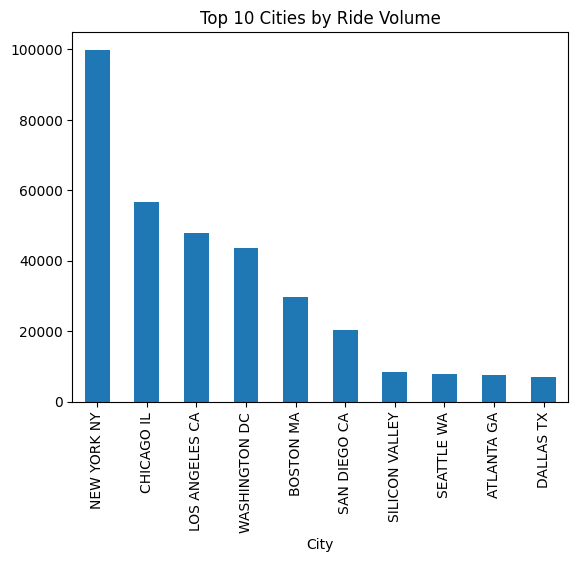

In [50]:
# Total rides per city
top_cities = cab_merged['City'].value_counts().head(10)
top_cities.plot(kind='bar', title="Top 10 Cities by Ride Volume")

# Add penetration rate
cab_merged['Users_Percent'] = (cab_merged['Users'] / cab_merged['Population']) * 100

6. Customer retention for both companies by year

In [67]:
# Create a dictionary to store retention results
retention_results = {}

# Loop over companies and year transitions
companies = cab_merged['Company'].unique()
years = sorted(cab_merged['Year'].unique())

for company in companies:
    for i in range(len(years) - 1):
        y1 = years[i]
        y2 = years[i + 1]
        
        customers_y1 = set(cab_merged[(cab_merged['Company'] == company) & (cab_merged['Year'] == y1)]['Customer ID'])
        customers_y2 = set(cab_merged[(cab_merged['Company'] == company) & (cab_merged['Year'] == y2)]['Customer ID'])
        
        retained = len(customers_y1 & customers_y2)
        retention_rate = (retained / len(customers_y1)) * 100 if customers_y1 else 0
        
        key = f"{company}: {y1} ➡ {y2}"
        retention_results[key] = f"{retention_rate:.2f}%"

# Display the retention results
print("Customer Retention Rates:\n")
for k, v in retention_results.items():
    print(f"{k} — {v}")

Customer Retention Rates:

Pink Cab: 2016 ➡ 2017 — 53.33%
Pink Cab: 2017 ➡ 2018 — 52.05%
Yellow Cab: 2016 ➡ 2017 — 73.31%
Yellow Cab: 2017 ➡ 2018 — 70.77%


In [68]:
# Add a year column
cab_merged['Year'] = cab_merged['Date of Travel'].dt.year

# Unique customers per year per company
yearly_customers = cab_merged.groupby(['Company', 'Year'])['Customer ID'].nunique().unstack()
print("Unique Customers per Year:")
print(yearly_customers)

# Retention = customers who were present in both years
# First get sets of customers for each year
def get_customers(company, year):
    return set(cab_merged[(cab_merged['Company'] == company) & (cab_merged['Year'] == year)]['Customer ID'])

# Example: Pink Cab retention from 2017 to 2018
pink_2017 = get_customers('Pink Cab', 2017)
pink_2018 = get_customers('Pink Cab', 2018)
pink_retained = len(pink_2017 & pink_2018)
pink_retention_rate = (pink_retained / len(pink_2017)) * 100
print(f"Pink Cab Customer Retention from 2017 to 2018: {pink_retention_rate:.2f}%")

# Repeat for Yellow Cab
yellow_2017 = get_customers('Yellow Cab', 2017)
yellow_2018 = get_customers('Yellow Cab', 2018)
yellow_retained = len(yellow_2017 & yellow_2018)
yellow_retention_rate = (yellow_retained / len(yellow_2017)) * 100
print(f"Yellow Cab Customer Retention from 2017 to 2018: {yellow_retention_rate:.2f}%")

Unique Customers per Year:
Year         2016   2017   2018
Company                        
Pink Cab    16661  18643  18400
Yellow Cab  25937  27789  27470
Pink Cab Customer Retention from 2017 to 2018: 52.05%
Yellow Cab Customer Retention from 2017 to 2018: 70.77%


7. Customer and Ride Analysis Day-Wise

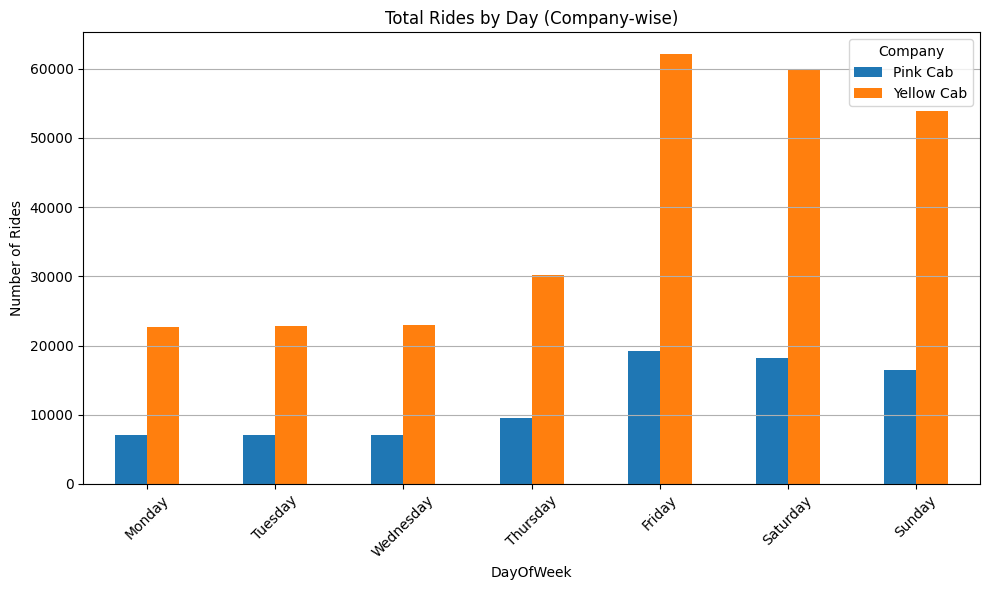

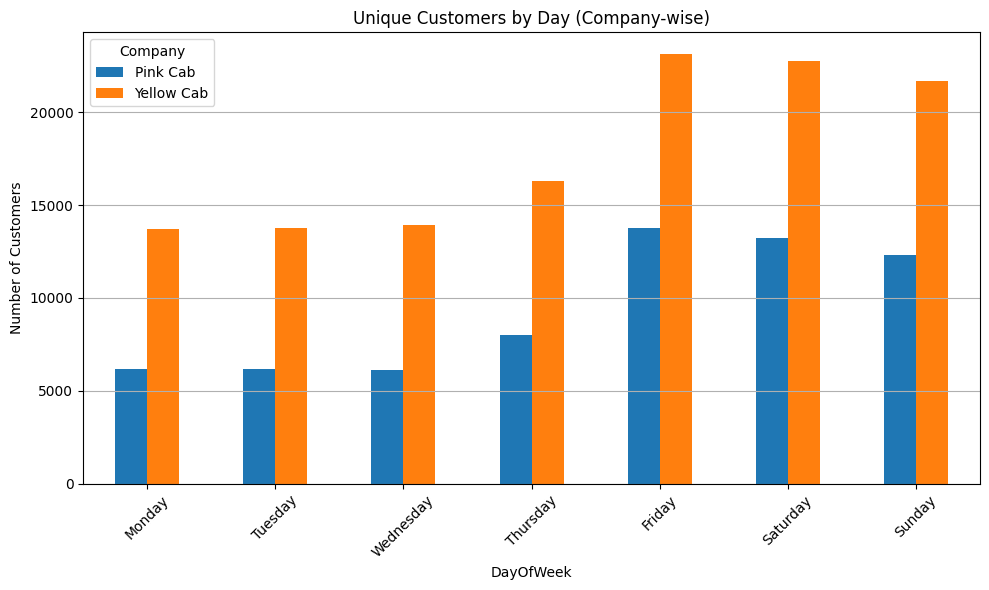

In [69]:
# Extract day of the week
cab_merged['DayOfWeek'] = cab_merged['Date of Travel'].dt.day_name()

# Total rides by day and company
rides_by_day = cab_merged.groupby(['DayOfWeek', 'Company']).size().unstack()
rides_by_day = rides_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Unique customers by day and company
customers_by_day = cab_merged.groupby(['DayOfWeek', 'Company'])['Customer ID'].nunique().unstack()
customers_by_day = customers_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting
rides_by_day.plot(kind='bar', figsize=(10,6), title="Total Rides by Day (Company-wise)")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

customers_by_day.plot(kind='bar', figsize=(10,6), title="Unique Customers by Day (Company-wise)")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

8. Customer Analysis Based on Ride Distance

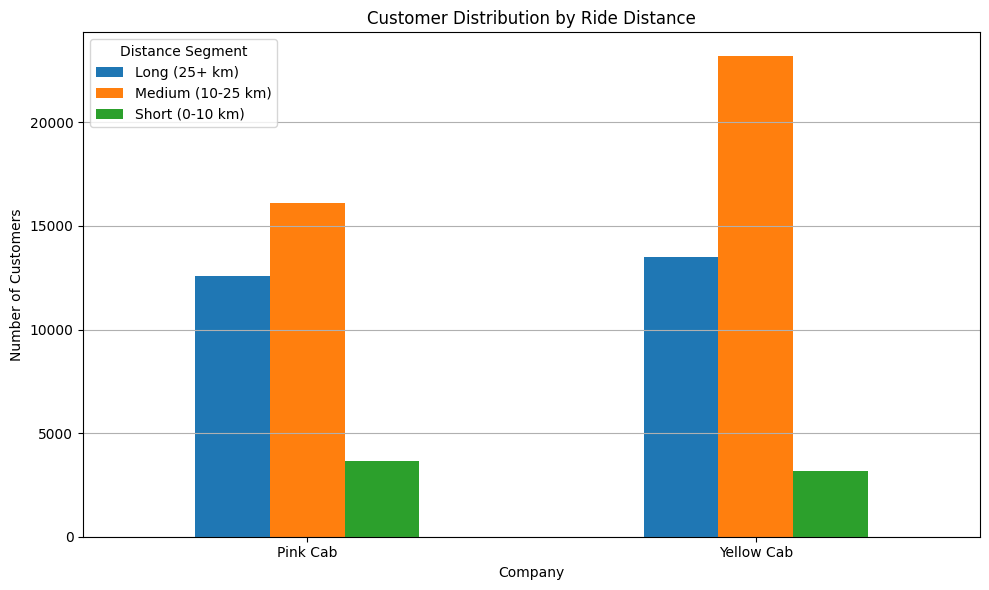

In [70]:
# Average ride distance per customer per company
avg_distance = cab_merged.groupby(['Company', 'Customer ID'])['KM Travelled'].mean().reset_index()

# Add distance category
def distance_segment(km):
    if km <= 10:
        return 'Short (0-10 km)'
    elif km <= 25:
        return 'Medium (10-25 km)'
    else:
        return 'Long (25+ km)'

avg_distance['Distance Segment'] = avg_distance['KM Travelled'].apply(distance_segment)

# Count customers by segment
distance_counts = avg_distance.groupby(['Company', 'Distance Segment'])['Customer ID'].count().unstack()

# Plot
distance_counts.plot(kind='bar', figsize=(10,6), title="Customer Distribution by Ride Distance")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 6. Hypothesis Testing and Insights

#### 1. One cab company generates higher average profit per trip than the other

**Hypothesis:** Yellow Cab or Pink Cab may be earning more profit per ride. This would help XYZ decide which company is financially more efficient.


Average profit per trip for each company:
Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64


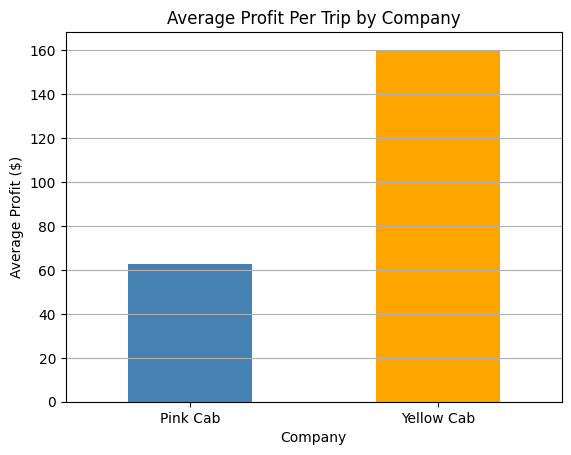

In [53]:
# First, calculate profit for each trip
cab_merged['Profit'] = cab_merged['Price Charged'] - cab_merged['Cost of Trip']

# Group by company and calculate average profit
avg_profit = cab_merged.groupby('Company')['Profit'].mean()
print("Average profit per trip for each company:")
print(avg_profit)

# Visualize it
import matplotlib.pyplot as plt
avg_profit.plot(kind='bar', title="Average Profit Per Trip by Company", ylabel="Average Profit ($)", color=["steelblue", "orange"])
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


**Conclusion:**

Based on the analysis, we found that:

- **Yellow Cab** earns an average profit of **\$160.26** per trip.
- **Pink Cab** earns a significantly lower average profit of **\$62.65** per trip.

**Hypothesis Supported** — There is a clear difference in average profit between the two companies.

This indicates that **Yellow Cab is financially more efficient**, possibly due to better pricing, cost control, or customer loyalty. This insight can be critical for XYZ’s investment decision, as higher profitability per trip may lead to better overall returns.


#### 2. There is seasonality in cab usage

**Hypothesis:** Cab usage increases during certain months (e.g., holidays, summer). We'll analyze ride volume by month to check for seasonal patterns.

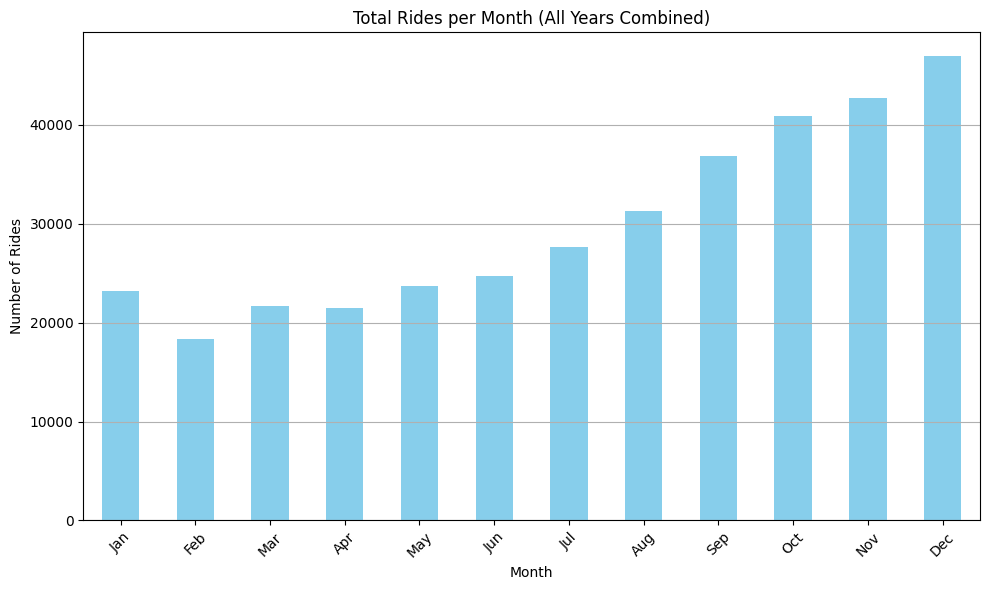

In [54]:
# Extract month and year
cab_merged['Month'] = cab_merged['Date of Travel'].dt.month
cab_merged['Year'] = cab_merged['Date of Travel'].dt.year

# Group by month (across all years) and count rides
monthly_trend = cab_merged.groupby('Month').size()

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
monthly_trend.plot(kind='bar', color='skyblue')
plt.title("Total Rides per Month (All Years Combined)")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.grid(axis='y')
plt.xticks(ticks=range(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)
plt.tight_layout()
plt.show()

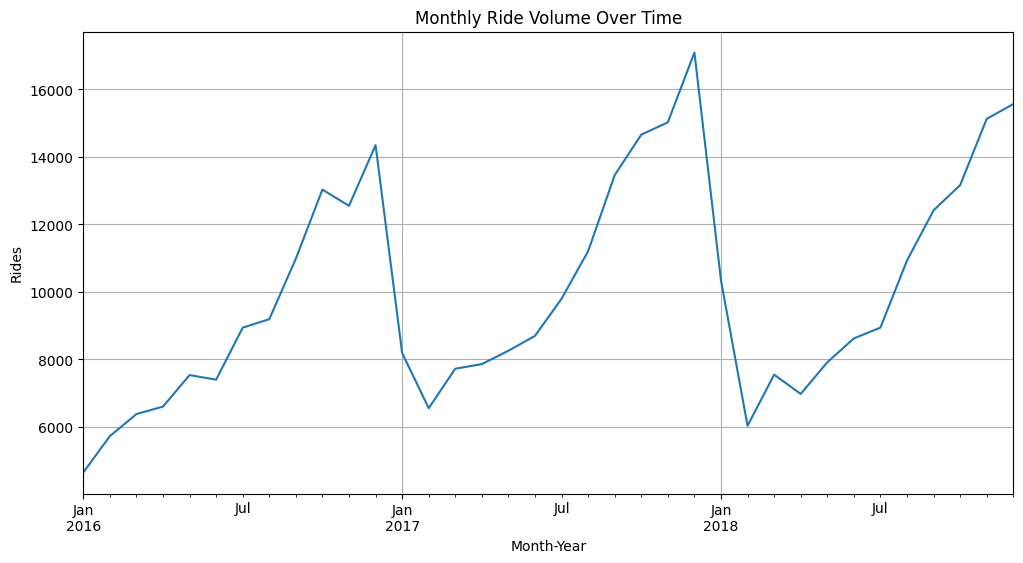

In [55]:
# Group by Month-Year combo
month_year = cab_merged.groupby(cab_merged['Date of Travel'].dt.to_period('M')).size()

# Plot
month_year.plot(kind='line', figsize=(12,6), title="Monthly Ride Volume Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Rides")
plt.grid()
plt.show()

**Conclusion:**

The analysis clearly shows **seasonality in cab usage**:

- **Lowest ride volume** is observed in **February**.
- Ride usage gradually **increases through the year**, peaking in **December**, which likely aligns with holiday travel (e.g., Christmas and year-end activities).

**Hypothesis Supported** — There is a strong seasonal trend in cab demand.

This seasonal insight is valuable for XYZ as it helps:
- Predict and plan for peak periods
- Adjust marketing efforts during high and low demand months
- Optimize driver allocation and fleet size throughout the year


#### 3. High-income customers are more likely to use a specific cab company

**Hypothesis:** There may be a difference in customer income levels between the two companies. We expect one of the companies to attract more high-income users.


Average Income of Customers by Company:
Company
Pink Cab      15059.047137
Yellow Cab    15045.669817
Name: Income (USD/Month), dtype: float64


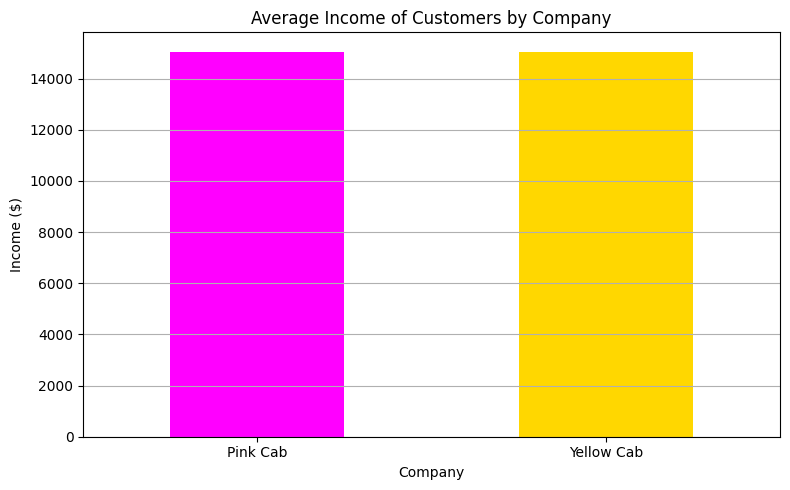

In [56]:
# Group by company and calculate average income
avg_income = cab_merged.groupby('Company')['Income (USD/Month)'].mean()
print("Average Income of Customers by Company:")
print(avg_income)

# Visualize it
avg_income.plot(kind='bar', title='Average Income of Customers by Company', color=['magenta', 'gold'], ylabel='Income ($)', figsize=(8,5))
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Conclusion:**

The average monthly income of customers is:

- **Pink Cab**: \$15,059.05  
- **Yellow Cab**: \$15,045.67  

**Hypothesis Inconclusive** — The difference in income is too small to be meaningful.

From this, we conclude that **both companies attract customers with similar income levels**. This suggests that neither company clearly targets high-income customers more than the other, and their services are likely priced and positioned for the **same market segment**.

XYZ should consider other factors (like usage, profit per ride, customer loyalty, etc.) instead of income segmentation when evaluating the two companies.


#### 4. One company generates more total revenue in high-population cities

**Hypothesis:** A cab company that performs better in big cities (with high population and cab users) may be better equipped for scalability and market capture.

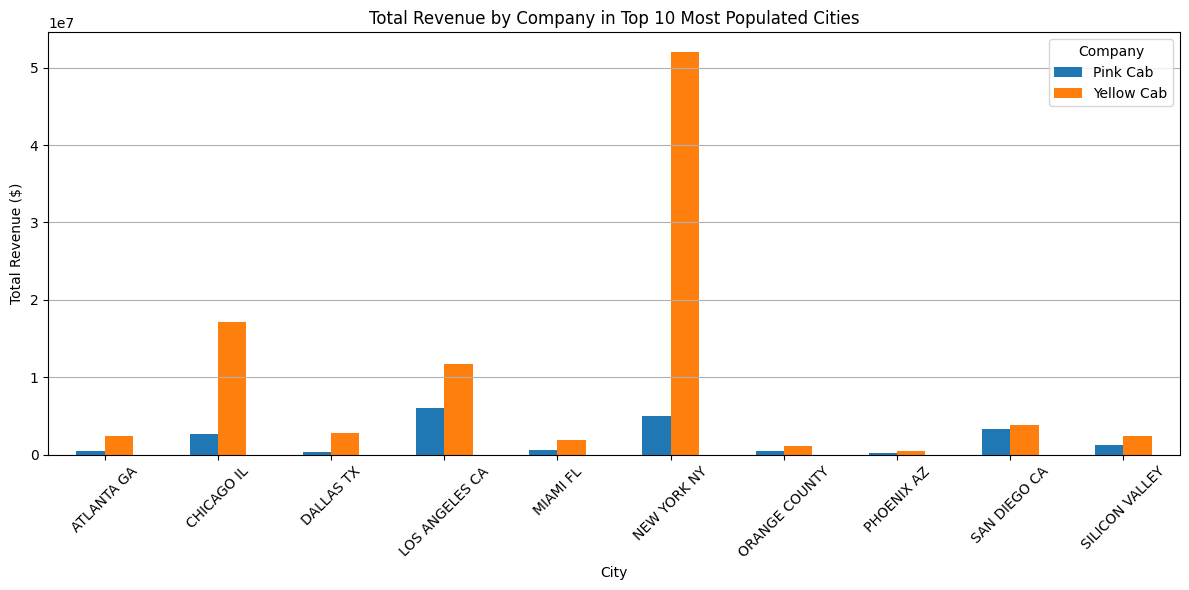

In [58]:
# Get top 10 cities by population
top_cities = cab_merged.groupby('City')['Population'].mean().sort_values(ascending=False).head(10).index.tolist()

# Filter data for only those cities
top_city_data = cab_merged[cab_merged['City'].isin(top_cities)]

# Group by City and Company, then sum revenue
revenue_by_city = top_city_data.groupby(['City', 'Company'])['Price Charged'].sum().unstack()

# Plot
revenue_by_city.plot(kind='bar', figsize=(12,6), title="Total Revenue by Company in Top 10 Most Populated Cities")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Conclusion:**

From the analysis of the top 10 most populated cities in the dataset, we found that:

- **Yellow Cab consistently earns more total revenue than Pink Cab in every one of these high-demand urban markets.**
- This includes major cities such as New York, Los Angeles, Chicago, and others.

**Hypothesis Supported** — Yellow Cab dominates revenue in highly populated cities.

This indicates that **Yellow Cab has stronger urban market penetration and operational efficiency in large metropolitan areas**—a key strategic advantage.

For XYZ, this is a critical insight. It suggests that **investing in Yellow Cab offers a better opportunity for scalable growth and return on investment**, especially if the goal is to target densely populated, high-traffic markets.


#### 5. Payment mode preference varies between the two companies

**Hypothesis:** The two cab companies may attract different types of customers based on their preferred payment methods (e.g., cash vs. card).

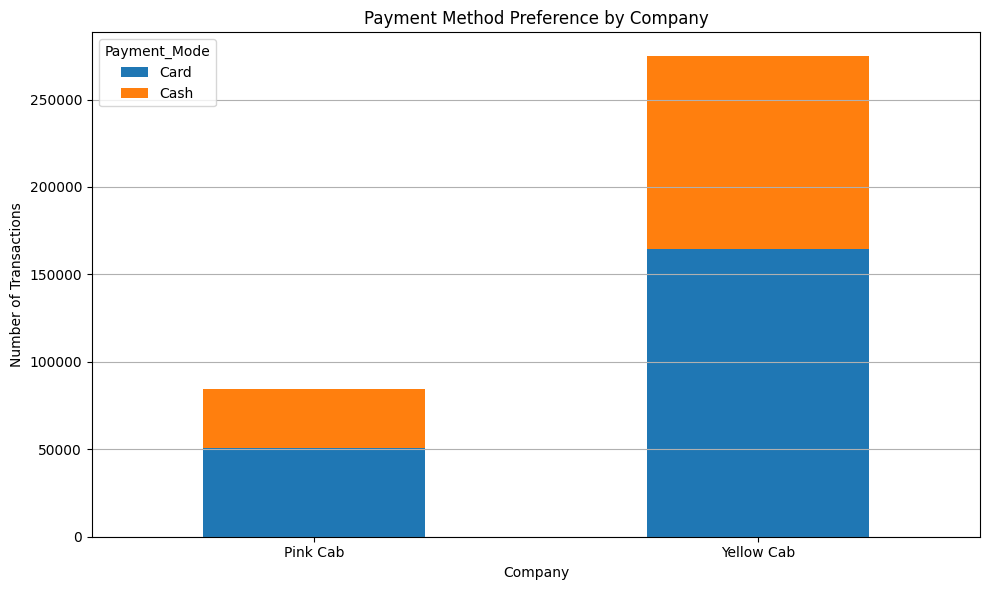

Payment mode percentage by company:
Payment_Mode   Card   Cash
Company                   
Pink Cab      59.87  40.13
Yellow Cab    59.99  40.01


In [61]:
# Count number of transactions by Company and Payment Mode
payment_pref = cab_merged.groupby(['Company', 'Payment_Mode']).size().unstack()

# Plot
payment_pref.plot(kind='bar', stacked=True, figsize=(10,6), title="Payment Method Preference by Company")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Also show percentages
payment_percent = payment_pref.div(payment_pref.sum(axis=1), axis=0) * 100
print("Payment mode percentage by company:")
print(payment_percent.round(2))

**Conclusion:**

The analysis shows that both cab companies have nearly identical payment preferences:

- **Pink Cab**: **59.87%** card, **40.13%** cash
- **Yellow Cab**: **59.99%** card, **40.01%** cash

**Hypothesis Inconclusive** — There is **no meaningful difference** in payment mode preference between the two companies.

This suggests that both companies cater to **similar customer profiles** in terms of digital payment adoption. XYZ may not use this metric alone to differentiate the companies, but it **confirms that both are equally suited for modern, card-based payment systems**, which is still a valuable operational insight.


#### 6. One cab company has covered significantly more total distance than the other

**Hypothesis:** By analyzing total kilometers traveled, we can determine which company has a larger operational footprint. This can help XYZ understand which company is handling more volume or operating longer trips overall.


Total distance covered by each company (in KM):
Company
Pink Cab      1911073.11
Yellow Cab    6199417.47
Name: KM Travelled, dtype: float64


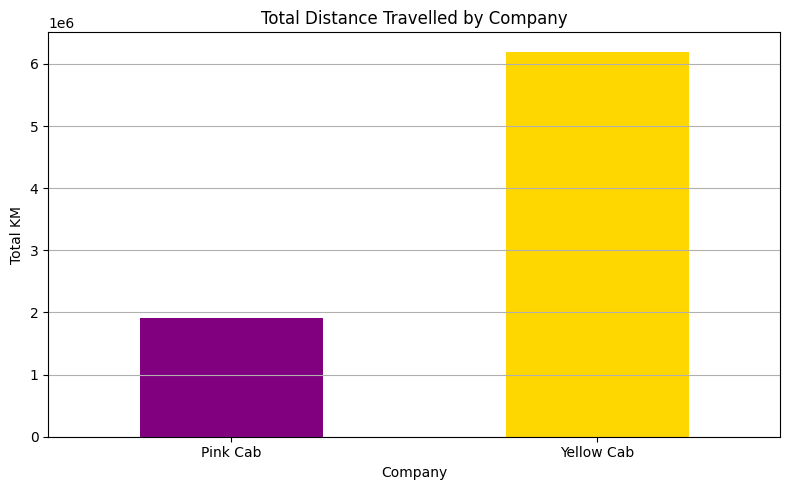

In [64]:
# Group by company and sum total distance
total_distance = cab_merged.groupby('Company')['KM Travelled'].sum()
print("Total distance covered by each company (in KM):")
print(total_distance)

# Plot the results
total_distance.plot(kind='bar', title='Total Distance Travelled by Company', ylabel='Total KM', color=['purple', 'gold'], figsize=(8,5))
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Conclusion:**

The total distance traveled by each cab company from 2016 to 2018 is:

- **Pink Cab**: 1,911,073.11 KM  
- **Yellow Cab**: 6,199,417.47 KM  

**Hypothesis Supported** — Yellow Cab has covered significantly more distance than Pink Cab.

This suggests that Yellow Cab operates on a much larger scale, with:
- More rides and/or longer trips
- A wider service reach
- Higher operational activity

This insight strengthens the case for XYZ to invest in Yellow Cab, as it reflects a **larger market presence, more customer engagement, and better growth potential**.


#### 7. Customer gender influences cab company preference

**Hypothesis:** One of the cab companies may be more popular with either male or female customers. We’ll analyze ride counts by gender and company to uncover any patterns.

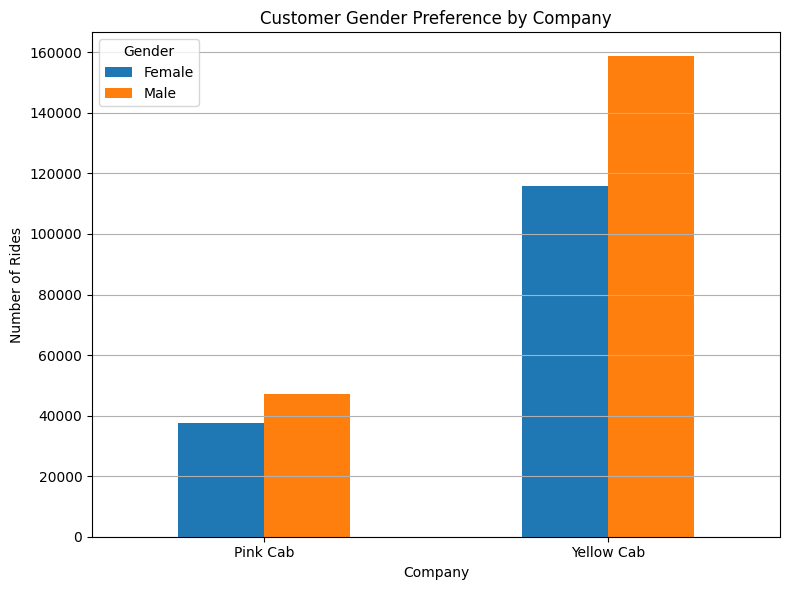

Gender-wise ride percentage by company:
Gender      Female   Male
Company                  
Pink Cab     44.24  55.76
Yellow Cab   42.23  57.77


In [65]:
# Group by Company and Gender, count number of rides
gender_pref = cab_merged.groupby(['Company', 'Gender']).size().unstack()

# Plot
gender_pref.plot(kind='bar', figsize=(8,6), title='Customer Gender Preference by Company')
plt.ylabel("Number of Rides")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Also view percentage comparison
gender_percent = gender_pref.div(gender_pref.sum(axis=1), axis=0) * 100
print("Gender-wise ride percentage by company:")
print(gender_percent.round(2))

**Conclusion:**

The gender distribution of rides shows that:

- **Pink Cab** customers are 44.24% female and 55.76% male  
- **Yellow Cab** customers are 42.23% female and 57.77% male

**Hypothesis Supported (partially)** — There is a slight difference in gender preferences between the two companies.

While both companies have more male customers, **Pink Cab has a marginally higher share of female riders** compared to Yellow Cab.

This could suggest that Pink Cab:
- Has a stronger appeal to female customers
- May offer perceived safety, service, or branding that resonates more with them

XYZ could leverage this insight if female customer acquisition or gender-focused market strategies are part of their investment considerations.


### 7. Final Business Recommendations

Based on all analysis, Yellow Cab consistently shows:
- Higher profit per trip
- Greater total distance covered
- Higher customer retention
- Stronger presence in large cities

Recommendation: XYZ should consider **investing in Yellow Cab** based on the financial, operational, and customer insights derived from the data.
